<a href="https://colab.research.google.com/github/LionelAgo/channel_postprocessing/blob/master/MultiD_Jpdfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

#Import Data

**Load Multi-D Jpdfs : https://app.box.com/s/tir5yedjhn17rusv164z8lsnvzoeihf7**

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/My Drive/Colab Notebooks"
import os
dir="/content/drive/My Drive/Colab Notebooks/Jpdfs/"
os.chdir(dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
print('Load data (r,u,v,w)-Jpdf')

rhom = 0.014
tauw = 5.92464e-05
utau=(tauw/rhom)**0.5
mu = 5.05967e-06
Retau=(rhom/mu)*utau



hf = h5py.File('MPdf_Full_nbins40.h5', 'r')
Pdf = hf.get('pdf')
yp = hf.get('yp')
#utau = hf.get('utau')
g1 = hf.get('limites')
B0 = g1.get('B0')
B1 = g1.get('B1')
B2 = g1.get('B2')
B3 = g1.get('B3')

Pdf=np.array(Pdf)
yp=np.array(yp)
B0=np.array(B0)
B1=np.array(B1)
B2=np.array(B2)
B3=np.array(B3)
hf.close()
print(f'Size of the M-pdf : {Pdf.shape}')

Load data (r,u,v,w)-Jpdf
Size of the M-pdf : (58, 40, 42, 44, 46)


# Define functions for extracting budgets  

In [0]:
def Xmeans(n0,n1,n2,n3,yi,Pdf=Pdf,B0=B0,B1=B1,B2=B2,B3=B3):
    b0=B0[yi]
    b1=B1[yi]
    b2=B2[yi]
    b3=B3[yi]
    
    x1 = (b1[1:]+b1[:-1])*0.5
    x2 = (b2[1:]+b2[:-1])*0.5
    x3 = (b3[1:]+b3[:-1])*0.5
    x0 = (b0[1:]+b0[:-1])*0.5
    
    Mpdf=np.squeeze(Pdf[yi,:,:,:,:])
    A=np.trapz(np.trapz(np.trapz(np.trapz(Mpdf,x0,axis=0),x1,axis=0),x2,axis=0),x3,axis=0)
    Mpdf=Mpdf/A
    
    
    X0,X1,X2,X3=np.meshgrid(x0,x1,x2,x3, indexing='ij')
    
    t=np.trapz(np.trapz(np.trapz(np.trapz((X0**n0)*(X1**n1)*(X2**n2)*(X3**n3)*Mpdf,x0,axis=0),x1,axis=0),x2,axis=0),x3,axis=0)
    return t

def Xproducts(n0,n1,n2,n3,yi,Favre=False,Pdf=Pdf,B0=B0,B1=B1,B2=B2,B3=B3):
    
    b0=B0[yi]
    b1=B1[yi]
    b2=B2[yi]
    b3=B3[yi]
    
    x1 = (b1[1:]+b1[:-1])*0.5
    x2 = (b2[1:]+b2[:-1])*0.5
    x3 = (b3[1:]+b3[:-1])*0.5
    x0 = (b0[1:]+b0[:-1])*0.5
    
    Mpdf=np.squeeze(Pdf[yi,:,:,:,:])
    A=np.trapz(np.trapz(np.trapz(np.trapz(Mpdf,x0,axis=0),x1,axis=0),x2,axis=0),x3,axis=0)
    Mpdf=Mpdf/A
    
    X0,X1,X2,X3=np.meshgrid(x0,x1,x2,x3, indexing='ij')
    
    
    Rm=0
    Um=0
    Vm=0
    Wm=0
    if Favre==True:
        
       if n0>0:
            Rm=Xmeans(1,0,0,0,yi)
       if n1>0:    
            Um=Xmeans(1,1,0,0,yi)
       if n2>0:    
            Vm=Xmeans(1,0,1,0,yi)
       if n3>0:    
            Wm=Xmeans(1,0,0,1,yi)
        
        
       t=np.trapz(np.trapz(np.trapz(np.trapz(((X0*X1-Um)**n1)*((X0*X2-Vm)**n2)*((X0*X3-Wm)**n3)*Mpdf,x0,axis=0),x1,axis=0),x2,axis=0),x3,axis=0)
       t=t/(Rm**(n1+n2+n3))
    else:    
        n0=0
        if n0>0:
            Rm=Xmeans(1,0,0,0,yi)
        if n1>0:    
            Um=Xmeans(0,1,0,0,yi)
        if n2>0:    
            Vm=Xmeans(0,0,1,0,yi)
        if n3>0:    
            Wm=Xmeans(0,0,0,1,yi)
    
        t=np.trapz(np.trapz(np.trapz(np.trapz(((X0-Rm)**n0)*((X1-Um)**n1)*((X2-Vm)**n2)*((X3-Wm)**n3)*Mpdf,x0,axis=0),x1,axis=0),x2,axis=0),x3,axis=0)
    
    
    
    
    return t    

# Budgets for a particular wall-normal location

In [0]:
#@title Enter wall normal location ind btw 0-58:
yi = 5 #@param {type:"slider", min:0, max:57, step:1}
Favre_average = 0 #@param {type:"slider", min:0, max:1, step:1}
print(f'yplus {np.round(yp[yi],2)}') 
fa = bool(Favre_average)

print(f'Favre Avrage = {fa}')

Rm=Xmeans(1,0,0,0,yi)
if fa == True :
  Um=Xmeans(1,1,0,0,yi)
  Um=Um/Rm
  Vm=Xmeans(1,0,1,0,yi)
  Vm=Vm/Rm
  Wm=Xmeans(1,0,0,1,yi)
  Wm=Wm/Rm
else:
  Um=Xmeans(0,1,0,0,yi)
  Vm=Xmeans(0,0,1,0,yi) 
  Wm=Xmeans(0,0,0,1,yi)


# double product
uu=Xproducts(1,2,0,0,yi,Favre=fa)
uv=Xproducts(1,1,1,0,yi,Favre=fa)
uw=Xproducts(1,1,0,1,yi,Favre=fa)
vv=Xproducts(1,0,2,0,yi,Favre=fa)
vw=Xproducts(1,0,1,1,yi,Favre=fa)
ww=Xproducts(1,0,0,2,yi,Favre=fa)
# triple product

uvw=Xproducts(0,1,1,1,yi,Favre=fa)



# quadruple product
uuuv=Xproducts(0,3,1,0,yi,Favre=fa) 

print(f'example: $uu^+={uu/utau**2}')

yplus 6.78
Favre Avrage = False
example: $uu^+=4.41437083004764


# Budgets  wall-normal distribution

In [0]:
Favre_average = 1 #@param {type:"slider", min:0, max:1, step:1}
#print(f'yplus {np.round(yp[yi],2)}') 
fa = bool(Favre_average)

Umean=[]
Vmean=[]
Wmean=[]
uu=[]
uv=[]
uw=[]
vv=[]
vw=[]
ww=[]

uvw=[]
uuu=[]

uuuv=[]


for yi in range(len(yp)): 
    print(f'yplus={yp[yi]}')

    Rm=Xmeans(1,0,0,0,yi)
    if fa == True :
      Um=Xmeans(1,1,0,0,yi)
      Um=Um/Rm
      Vm=Xmeans(1,0,1,0,yi)
      Vm=Vm/Rm
      Wm=Xmeans(1,0,0,1,yi)
      Wm=Wm/Rm
    else:
      Um=Xmeans(0,1,0,0,yi)
      Vm=Xmeans(0,0,1,0,yi) 
      Wm=Xmeans(0,0,0,1,yi)


    Umean.append(Um)
    Vmean.append(Vm)
    Wmean.append(Wm)

    
    # double product
    uu.append(Xproducts(1,2,0,0,yi,Favre=fa))
    uv.append(Xproducts(1,1,1,0,yi,Favre=fa))
    uw.append(Xproducts(1,1,0,1,yi,Favre=fa))
    vv.append(Xproducts(1,0,2,0,yi,Favre=fa))
    vw.append(Xproducts(1,0,1,1,yi,Favre=fa))
    ww.append(Xproducts(1,0,0,2,yi,Favre=fa))

    # triple product

    uvw.append(Xproducts(1,1,1,1,yi,Favre=fa))

    uuu.append(Xproducts(1,3,0,0,yi,Favre=fa))

    # quadruple product
    uuuv.append(Xproducts(1,3,1,0,yi,Favre=fa)) 

    



yplus=0.2368979100162058
yplus=1.18848231775935
yplus=2.670934784712512
yplus=4.345093819875784
yplus=5.827546286828945
yplus=6.77913069457209
yplus=7.323488670630321
yplus=8.558510983951894
yplus=10.482525144154437
yplus=12.65534738425327
yplus=14.579361544455812
yplus=15.814383857777386
yplus=16.51538807606533
yplus=18.096197628205644
yplus=20.558906139699126
yplus=23.340085163917113
yplus=25.802793675410594
yplus=27.383603227550907
yplus=28.27203229070977
yplus=30.25991291329474
yplus=33.35678851253734
yplus=36.85414332210141
yplus=39.95101892134399
yplus=41.93889954392896
yplus=43.042425809906334
yplus=45.48724950356968
yplus=49.29598668594168
yplus=53.59725900905083
yplus=57.40599619142283
yplus=59.850819885086175
yplus=61.18787171534645
yplus=64.11379052394082
yplus=68.67201522856016
yplus=73.81969668456475
yplus=78.3779213891841
yplus=81.30384019777846
yplus=82.87608195328335
yplus=86.26562932857698
yplus=91.54613080324485
yplus=97.50949182228501
yplus=102.78999329695291
yplus=1

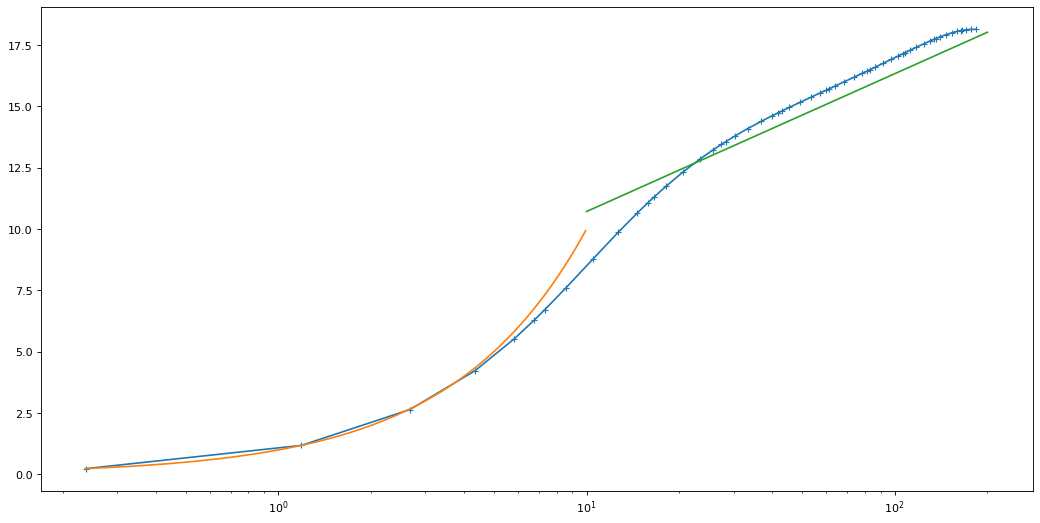

In [0]:
_, ax = plt.subplots(1, 1, sharey=True,figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.semilogx(yp,np.array(Umean)/utau,'+-') 
plt.semilogx(np.arange(yp[0],10,0.1),np.arange(yp[0],10,0.1))
xx=np.linspace(10,200,100)
plt.semilogx(xx,np.log(xx)/0.41+5.1)

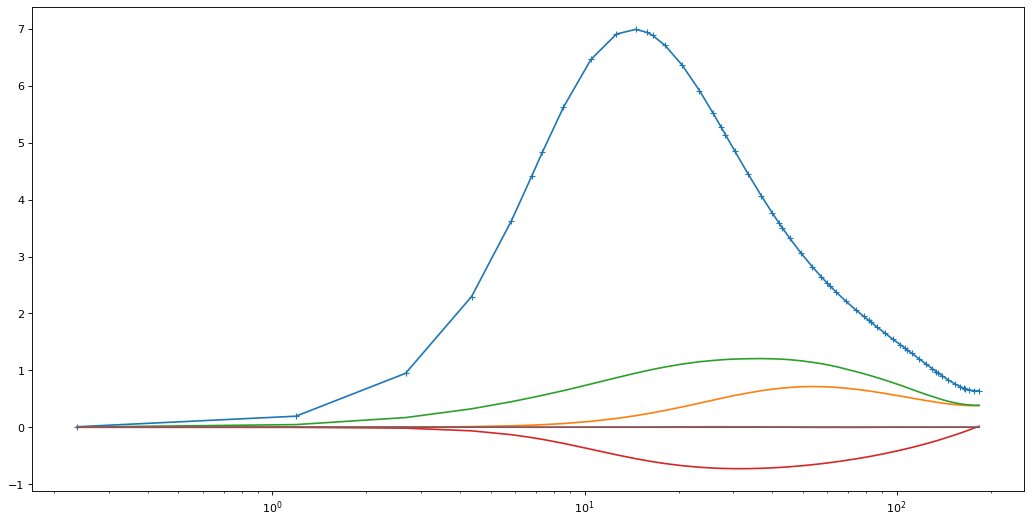

In [0]:
_, ax = plt.subplots(1, 1, sharey=True,figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.semilogx(yp,np.array(uu)/utau**2,'-+')
plt.semilogx(yp,np.array(vv)/utau**2)
plt.semilogx(yp,np.array(ww)/utau**2)
plt.semilogx(yp,np.array(uv)/utau**2)
plt.semilogx(yp,np.array(uw)/utau**2)
plt.semilogx(yp,np.array(vw)/utau**2)

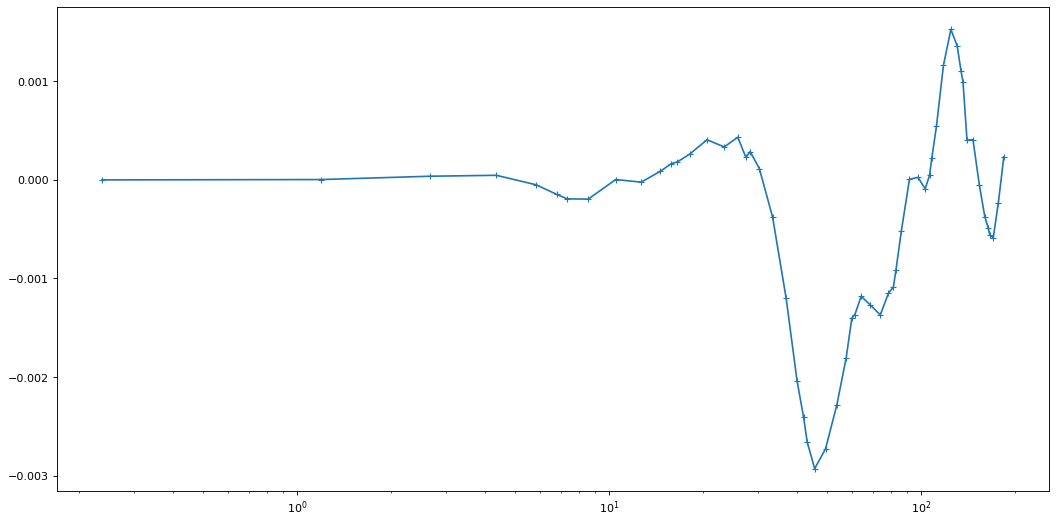

In [0]:
_, ax = plt.subplots(1, 1, sharey=True,figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax.semilogx(yp,np.array(uvw)/utau**3,'-+')

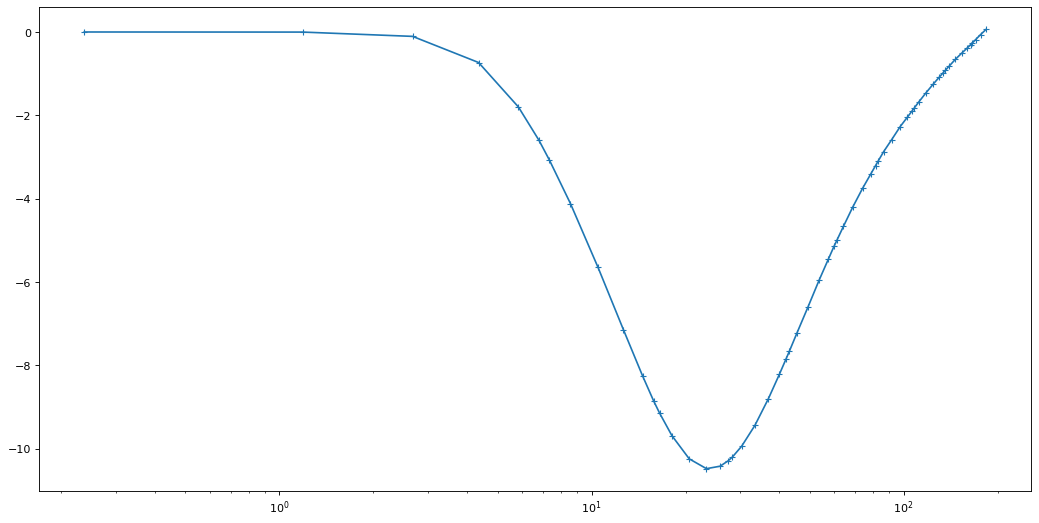

In [0]:
_, ax = plt.subplots(1, 1, sharey=True,figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax.semilogx(yp,np.array(uuuv)/utau**4,'-+')

Text(0.5, 0, '$y^+$')

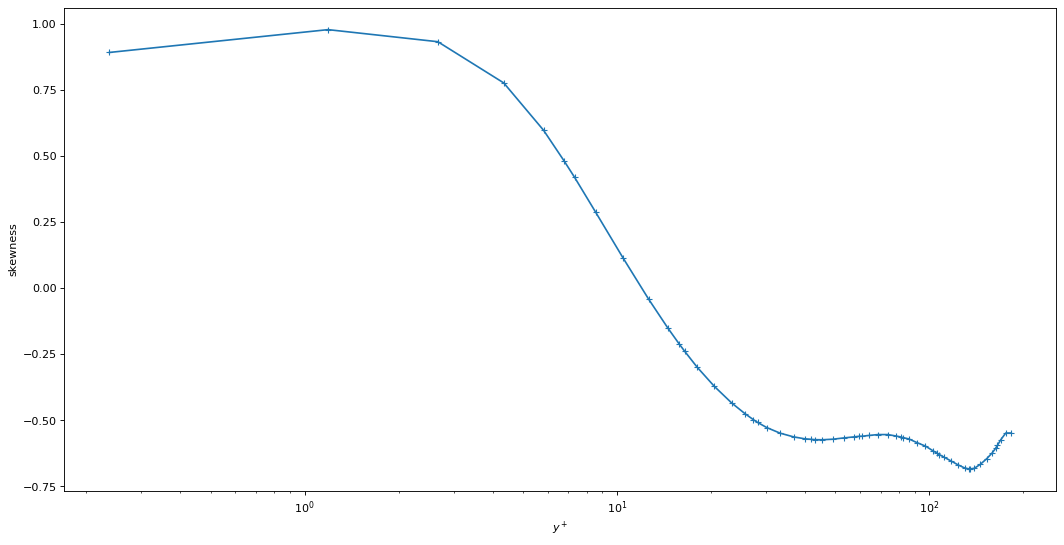

In [0]:
_, ax = plt.subplots(1, 1, sharey=True,figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
ax.semilogx(yp,np.array(uuu)/(np.array(uu)**(3/2)),'-+')
plt.ylabel('skewness')
plt.xlabel('$y^+$')